In [6]:
import torch

from sklearn.decomposition import PCA
from torchvision import datasets, transforms

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Just boilerplate code to visualize stuff
def visualize_scatter(data_2d, label_ids, id_to_label_dict, figsize=(20, 20)):
    plt.figure(figsize=figsize)
    plt.grid()

    nb_classes = len(np.unique(label_ids))

    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    marker='o',
                    color=plt.cm.Set1(label_id / float(nb_classes)),
                    linewidth='1',
                    alpha=0.6,
                    label=id_to_label_dict[label_id])
        
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.legend(loc='best')
    plt.show()

In [8]:
CUDA = True
BATCH_SIZE = 8

# Data keyword-arguments
kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}

# Getting our training and testing dataset
train_dataset = datasets.MNIST(
    './data', train=True, download=True,
    transform=transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.1307,), (0.3081,))
   ])
)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True, **kwargs
)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True, **kwargs)

In [9]:
# Autoencoders section
# Dang dang, only demo if we have enough time

# PCA Visualization
# Dimensionality Reduction

data = []
labels = []

for idx, (x, target) in enumerate(train_loader):
    data.extend(x.view(x.size(0), -1).cpu().numpy())
    labels.extend(target)
    
data = np.array(data)
data_pca = PCA().fit_transform(data)

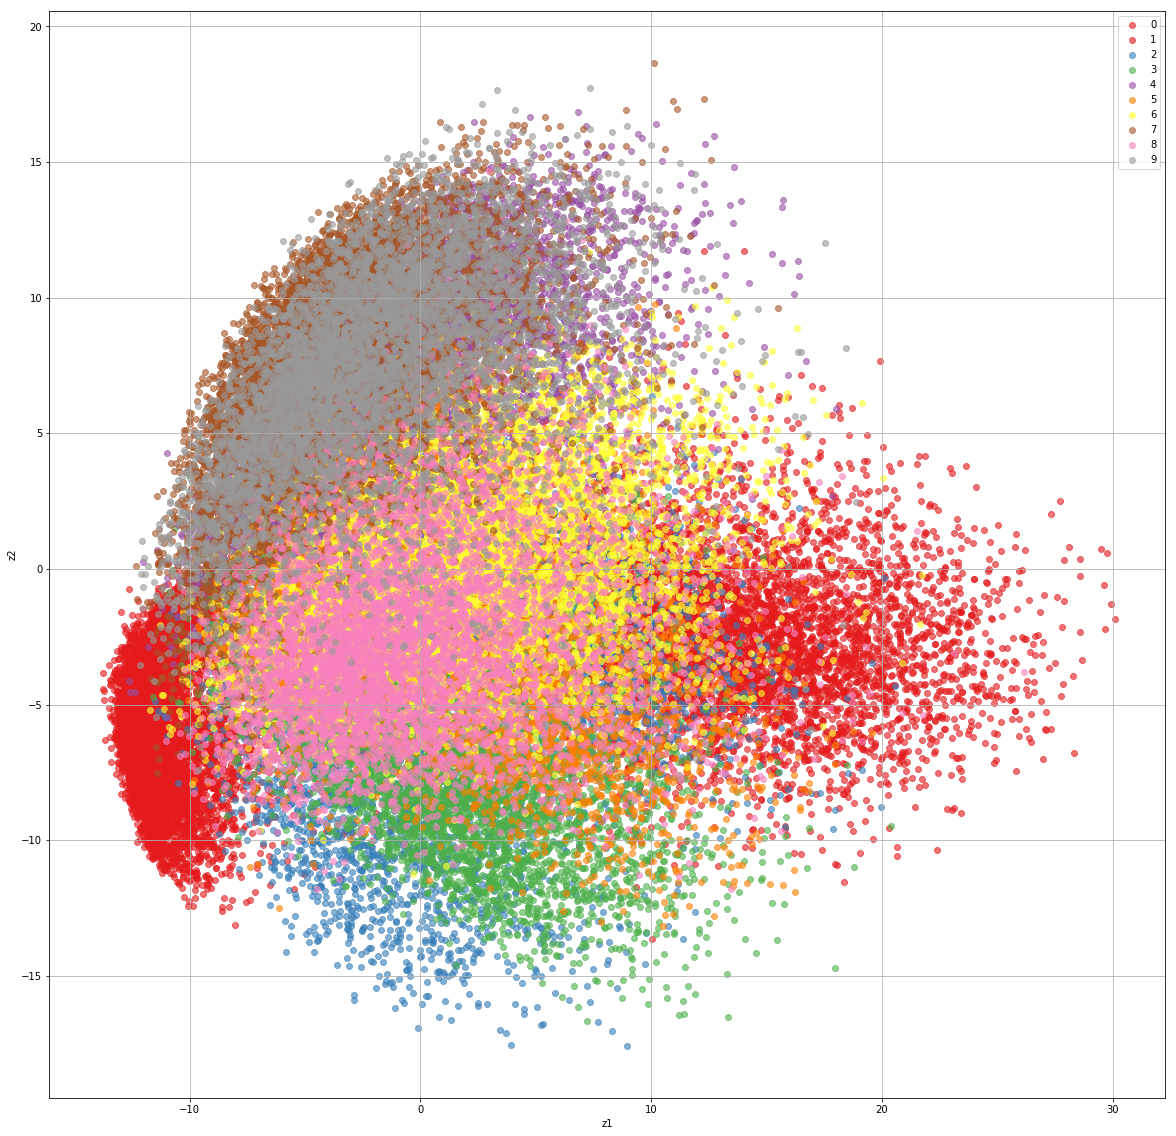

In [10]:
# Plot stuff
label_to_id_dict = {v: i for i, v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
label_ids = np.array([label_to_id_dict[x] for x in labels])

visualize_scatter(data_pca, label_ids, id_to_label_dict)